What to do:

- read csv file (read csv function pandas)
- find and report number of data points (first value of .shape)
- find number of null value
- replace null values w/ averages
- report categorical features

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
stressData = pd.read_csv("SaYoPillow.csv")

In [ ]:
np.shape(stressData)

(630, 9)

In [ ]:
np.sum(stressData.isnull())

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

Things to ask about:
- snoring range
    - kinda weird bc the dB levels are really high



# **Discretizing categorical features:**

Body temp:

In [ ]:
def categoricalTemp():
  tempFeatures = []
  for i, row in stressData.iterrows():
    temp = row['t']
    if temp < 95.5:
      category = 'low'
    elif temp >= 95.5 and temp <= 98:
      category = 'medium'
    else:
      category = 'high'
    tempFeatures.append(category)
  return tempFeatures

tempFeatures = categoricalTemp()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(tempFeatures)
tempFeatures = le.transform(tempFeatures)
print(tempFeatures)

[1 1 2 1 2 1 2 0 2 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 0
 1 2 1 1 1 1 0 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 2 1 1 2 2
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 0 0 1 1 2 1 1 1 0 1 2 0 2
 2 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 2
 1 2 1 1 1 1 1 1 1 1 2 2 0 1 1 2 2 0 1 1 2 1 1 2 1 1 1 2 0 1 1 2 1 1 1 2 1
 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 0
 1 2 1 1 1 0 2 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 2 1 1 1 1 1 1 2 1 0 1 1 0 1
 1 1 2 1 2 2 1 2 2 1 1 1 1 0 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 2 2 1
 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 2 2 1 1 0 1 1 1 2 0 1 2 2 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 0 1 1 2 1 1 0 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 

Blood O2:

In [ ]:
def categoricalBloodOxygen():
  bloodOxygenFeatures = []
  for i, row in stressData.iterrows():
    bo = row['bo']
    if bo < 90:
      category = 'low'
    elif bo >= 90 and bo < 95:
      category = 'less than normal'
    else:
      category = 'normal'
    bloodOxygenFeatures.append(category)
  return bloodOxygenFeatures

bloodOxygenFeatures = categoricalBloodOxygen()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(bloodOxygenFeatures)
bloodOxygenFeatures = le.transform(bloodOxygenFeatures)
print(bloodOxygenFeatures)

[1 1 2 1 2 0 2 2 2 0 0 0 2 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 2 1 2 1 0 1 2
 1 2 1 0 0 0 2 0 1 0 1 0 1 2 0 1 2 0 0 1 1 1 0 1 1 2 0 1 0 2 0 1 2 0 1 0 2
 2 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 2 0 1 0 0 1 1 1 2 1 0 0 0 0 1 0 0
 1 2 1 0 1 0 0 2 0 0 1 1 0 1 1 1 0 0 1 0 2 1 1 0 2 2 0 1 2 0 1 0 2 0 2 2 2
 2 0 1 2 1 1 2 0 1 0 1 1 1 0 0 0 1 0 2 2 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2
 0 2 0 0 0 0 0 1 1 1 2 2 2 0 1 2 2 2 0 1 2 0 1 0 0 0 1 2 2 1 1 2 0 0 0 0 1
 2 0 1 1 0 0 1 2 1 1 0 1 2 2 1 1 1 0 1 1 1 1 1 2 1 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 1 0 2 2 0 0 1 0 0 1 1 0 2 1 0 0 1 1 1 1 1 2 1 2 0 1 1 1 0 1 2 1 2 1 2
 0 0 0 0 1 2 2 1 0 0 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 0 1 1 1 0 0 2 0 1 2 0
 1 1 2 0 2 2 1 2 2 0 1 0 1 2 0 1 1 1 1 1 1 1 0 2 1 0 1 0 0 0 0 1 2 1 2 0 1
 1 1 0 2 1 0 0 1 2 0 1 0 0 2 1 2 0 0 1 0 1 0 1 0 1 0 2 1 1 1 1 1 1 0 0 1 0
 1 1 0 2 1 1 0 0 2 0 1 1 2 0 1 1 2 2 0 0 2 1 2 1 0 2 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 2 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 2 2 1 0 2 1 0 2 0 1 2
 2 1 0 0 1 0 1 0 1 0 1 0 

Hours slept:

In [ ]:
def categoricalSleep():
  sleepFeatures = []
  for i, row in stressData.iterrows():
    hours = row['sr.1']
    if hours < 7:
      category = 'not enough'
    elif hours >= 7 and hours <= 9:
      category = 'good'
    else:
      category = 'over'
    sleepFeatures.append(category)
  return sleepFeatures

sleepFeatures = categoricalSleep()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(sleepFeatures)
sleepFeatures = le.transform(sleepFeatures)
print(sleepFeatures)

[1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 

# **Categorical features**

In [ ]:
df = pd.DataFrame(stressData)
df['temp'] = tempFeatures
print(df)

         sr      rr       t      lm      bo     rem   sr.1     hr  sl  temp
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3     1
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3     1
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1     2
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3     1
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0     2
..      ...     ...     ...     ...     ...     ...    ...    ...  ..   ...
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2     1
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0     0
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4     1
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1     2
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2     1

[630 rows x 10 columns]


In [ ]:
df = pd.DataFrame(stressData)
df['bloodO2'] = bloodOxygenFeatures
print(df)

         sr      rr       t      lm      bo     rem   sr.1     hr  sl  temp  \
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3     1   
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3     1   
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1     2   
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3     1   
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0     2   
..      ...     ...     ...     ...     ...     ...    ...    ...  ..   ...   
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2     1   
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0     0   
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4     1   
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1     2   
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2     1   

     bloodO2  
0          1  
1          1  
2     

In [ ]:
df = pd.DataFrame(stressData)
df['hrSlept'] = sleepFeatures
print(df)

         sr      rr       t      lm      bo     rem   sr.1     hr  sl  temp  \
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3     1   
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3     1   
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1     2   
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3     1   
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0     2   
..      ...     ...     ...     ...     ...     ...    ...    ...  ..   ...   
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2     1   
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0     0   
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4     1   
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1     2   
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2     1   

     bloodO2  hrSlept  
0          1        1  
1  

Downloading the new data:

In [ ]:
df.to_csv('stressData2.csv')

#**Data Visualization:**

PCA Stuff:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(stressData)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

*****work on this more**

In [ ]:
def create_pca_plot(category):
  principal_df[category] = stressData[category] # Categories to visualize

  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('First Principal Component', fontsize = 15)
  ax.set_ylabel('Second Principal Component', fontsize = 15)
  targets = pd.unique(stressData[category]).tolist() # All possible y values
  colors = ['red', 'blue', 'orange', 'purple'] # different colors for different targets
  colors = colors[:len(targets)]
  for target, color in zip(targets, colors): # label points by antibiotic resistant target
      indicesToKeep = principal_df[category] == target
      ax.scatter(principal_df.loc[indicesToKeep, 'PC1'],
                principal_df.loc[indicesToKeep, 'PC2'],
                c = color, s = 40, alpha=0.75)
  #if category == 'smoker':
    #names = ['Non-Smoker', 'Smoker']
  #elif category == 'sex':
    #names = ['Female', 'Male']
  #elif category == 'region':
    #names = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
  ax.legend(targets, loc='lower right')
  ax.get_xaxis().set_ticks([]);
  ax.get_yaxis().set_ticks([]);

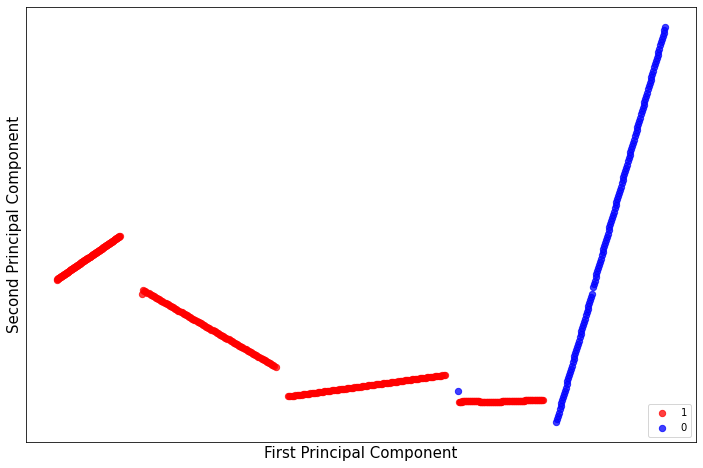

In [ ]:
create_pca_plot('hrSlept')

Exploratory Data Analysis:

In [ ]:
stressData.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl,temp,bloodO2,hrSlept
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.00000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000,1.11746,0.801587,0.798413
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337,0.48721,0.750409,0.401504
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000,1.00000,0.000000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000,1.00000,1.000000,1.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000,1.00000,1.000000,1.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000,2.00000,2.000000,1.000000


**Histograms:**

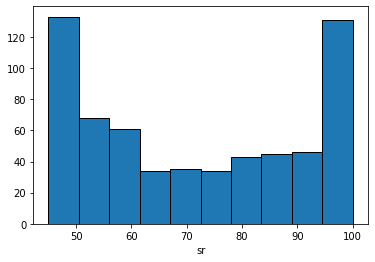

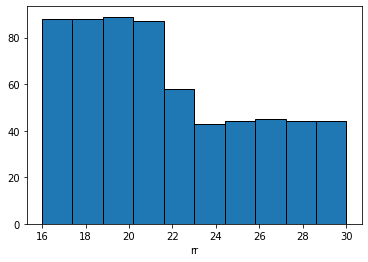

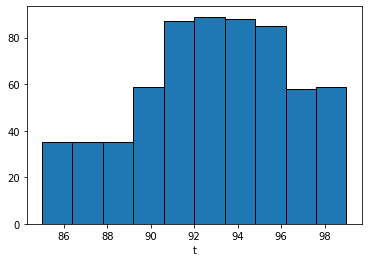

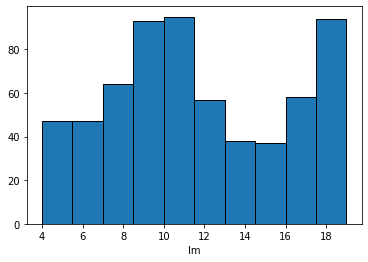

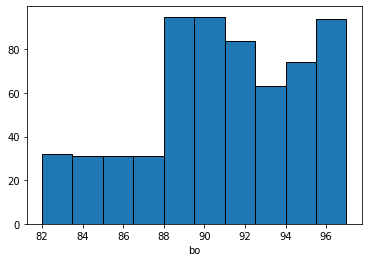

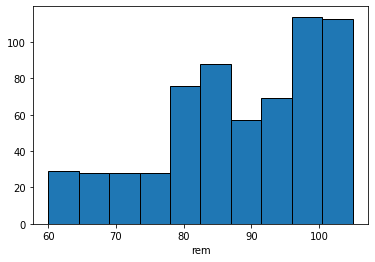

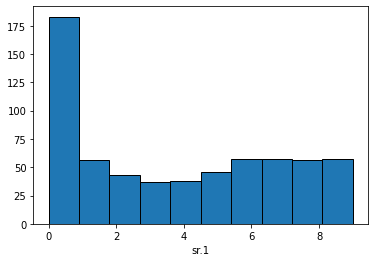

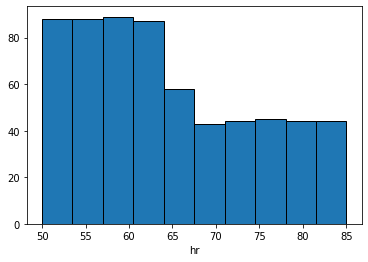

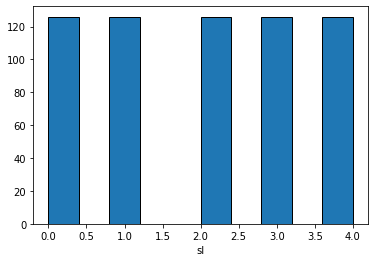

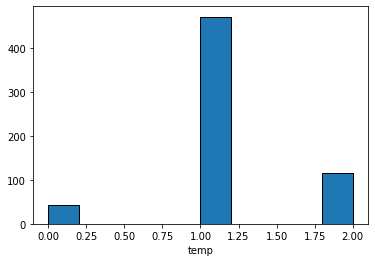

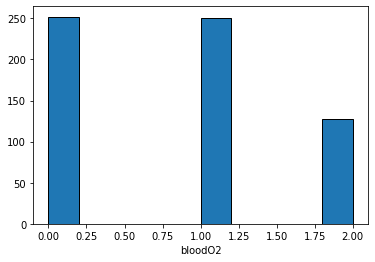

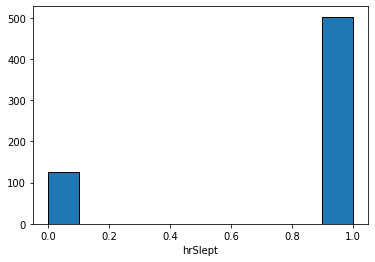

In [ ]:
plt.hist(stressData['sr'], edgecolor = 'black')
plt.xlabel('sr')
plt.show()
plt.hist(stressData['rr'], edgecolor = 'black')
plt.xlabel('rr')
plt.show()
plt.hist(stressData['t'], edgecolor = 'black')
plt.xlabel('t')
plt.show()
plt.hist(stressData['lm'], edgecolor = 'black')
plt.xlabel('lm')
plt.show()
plt.hist(stressData['bo'], edgecolor = 'black')
plt.xlabel('bo')
plt.show()
plt.hist(stressData['rem'], edgecolor = 'black')
plt.xlabel('rem')
plt.show()
plt.hist(stressData['sr.1'], edgecolor = 'black')
plt.xlabel('sr.1')
plt.show()
plt.hist(stressData['hr'], edgecolor = 'black')
plt.xlabel('hr')
plt.show()
plt.hist(stressData['sl'], edgecolor = 'black')
plt.xlabel('sl')
plt.show()
plt.hist(stressData['temp'], edgecolor = 'black')
plt.xlabel('temp')
plt.show()
plt.hist(stressData['bloodO2'], edgecolor = 'black')
plt.xlabel('bloodO2')
plt.show()
plt.hist(stressData['hrSlept'], edgecolor = 'black')
plt.xlabel('hrSlept')
plt.show()

**Scatter Plots:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


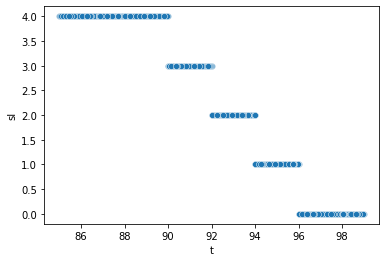

In [ ]:
sns.scatterplot(stressData['t'], stressData['sl'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


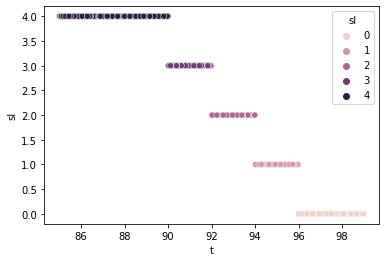

In [ ]:
sns.scatterplot(stressData['t'], stressData['sl'], hue = stressData['sl'])
plt.show()

# **Regression Model:**

**Random Forest:**

In [ ]:
y = stressData['sl']
X = stressData.drop(columns = 'sl')

In [ ]:
#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(504, 11)
(126, 11)
(504,)
(126,)


In [ ]:
#Initialization
randomForestModel = RandomForestRegressor(max_depth=2, random_state=0)

#Training
randomForestModel.fit(X_train, y_train)

#Prediction
rf_prediction = randomForestModel.predict(X_test)

#Evaluation
mean_absolute_error(y_test, rf_prediction)

0.1712881255380838

**Ridge:**

In [ ]:
#Initialization
reg = linear_model.Ridge(alpha = 0.5)

#Training
reg.fit(X_train, y_train)

#Prediction
ridge_prediction = reg.predict(X_test)

#Evaluation
mean_absolute_error(y_test, ridge_prediction)

0.006754753856839969

ridge worked better than random forest :D

**Decision Tree:**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Initialization
regressor = DecisionTreeRegressor(random_state=0)

#Training
regressor.fit(X_train , y_train)

#Prediction
dt_prediction = regressor.predict(X_test)

#Evaluation
mean_absolute_error(y_test, dt_prediction)

0.007936507936507936

worse than ridge but better than random forest

**SVM:**

In [ ]:
from sklearn import svm

#Initialization
regr = svm.SVR()

#Training
regr.fit(X_train , y_train)

#Prediction
svm_prediction = regr.predict(X_test)

#Evaluation
mean_absolute_error(y_test, svm_prediction)

0.10908222803926367

SVM proformed the worst of the four

# **Model Metrics:**

Supervised learning w/ regression model

**Mean Squared Error:**

All mean squared errors:

In [ ]:
print(mean_squared_error(y_test, svm_prediction))
print(mean_squared_error(y_test, rf_prediction))
print(mean_squared_error(y_test, dt_prediction))
print(mean_squared_error(y_test, ridge_prediction))

0.016141256330931684
0.039963120405365926
0.007936507936507936
0.00011214844833644185


SVM Mean Squared Error:

In [ ]:
svm_mse = (y_test - svm_prediction)**2
print(svm_mse)
print(svm_mse.mean())

558    0.010230
553    0.035110
604    0.017803
552    0.033957
407    0.013097
         ...   
475    0.017993
50     0.056274
89     0.009323
419    0.068988
311    0.000007
Name: sl, Length: 126, dtype: float64
0.016141256330931684


Random Forest Mean Squared Error:

In [ ]:
rf_mse = (y_test - rf_prediction)**2
print(rf_mse)
print(rf_mse.mean())

558    0.097827
553    0.016886
604    0.016886
552    0.000724
407    0.052620
         ...   
475    0.052620
50     0.016886
89     0.097827
419    0.016886
311    0.000724
Name: sl, Length: 126, dtype: float64
0.039963120405365926


Decision Tree Mean Squared Error:

In [ ]:
dt_mse = (y_test - dt_prediction)**2
print(dt_mse)
print(dt_mse.mean())

558    0.0
553    0.0
604    0.0
552    0.0
407    0.0
      ... 
475    0.0
50     0.0
89     0.0
419    0.0
311    0.0
Name: sl, Length: 126, dtype: float64
0.007936507936507936


Ridge Mean Squared Error:

In [ ]:
ridge_mse = (y_test - ridge_prediction)**2
print(ridge_mse)
print(ridge_mse.mean())

558    5.233515e-06
553    2.687229e-05
604    6.080297e-05
552    1.320942e-04
407    4.225946e-06
           ...     
475    2.381798e-06
50     9.953501e-06
89     1.494585e-08
419    4.581531e-06
311    1.687506e-05
Name: sl, Length: 126, dtype: float64
0.00011214844833644185


**Root Mean Squared Error:**

SVM Root Mean Squared Error:

In [ ]:
svm_rmes = np.sqrt(svm_mse.mean())
print(svm_rmes)

0.12704824410802254


Random Forest Root Mean Squared Error:

In [ ]:
rf_rmes = np.sqrt(rf_mse.mean())
print(rf_rmes)

0.19990777975197946


Decision Tree Root Mean Squared Error:

In [ ]:
dt_rmes = np.sqrt(dt_mse.mean())
print(dt_rmes)

0.0890870806374748


Ridge Root Mean Squared Error:

In [ ]:
ridge_rmes = np.sqrt(ridge_mse.mean())
print(ridge_rmes)

0.010590016446467015


**R^2 Score:**

In [ ]:
from sklearn.metrics import r2_score

SVM R^2 Score:

In [ ]:
r2_score(y_test, svm_prediction)

0.9921776988550101

Random Forest R^2 Score:

In [ ]:
r2_score(y_test, rf_prediction)

0.9806332570343227

Decision Tree R^2 Score:

In [ ]:
r2_score(y_test, dt_prediction)

0.9961538461538462

Ridge R^2 Score:

In [ ]:
r2_score(y_test, ridge_prediction)

0.9999456511365754

# **Classification Model:**

In [ ]:
def categoricalStress():
  stressFeatures = []
  for i, row in stressData.iterrows():
    stress = row['sl']
    if stress < 3:
      category = 'low'
    else:
      category = 'high'
    stressFeatures.append(category)
  return stressFeatures

stressFeatures = categoricalStress()

In [ ]:
le = LabelEncoder()
le.fit(sleepFeatures)
sleepFeatures = le.transform(sleepFeatures)
print(sleepFeatures)

[1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
df = pd.DataFrame(stressData)
df['hi_low'] = sleepFeatures
print(df)

         sr      rr       t      lm      bo     rem   sr.1     hr  sl  temp  \
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3     1   
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3     1   
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1     2   
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3     1   
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0     2   
..      ...     ...     ...     ...     ...     ...    ...    ...  ..   ...   
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2     1   
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0     0   
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4     1   
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1     2   
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2     1   

     bloodO2  hrSlept  hi_low  
0          1       

In [ ]:
y = stressData['hi_low']
X = stressData.drop(columns = 'sl')

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(504, 12)
(126, 12)
(504,)
(126,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# **Model Metrics (Classification):**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

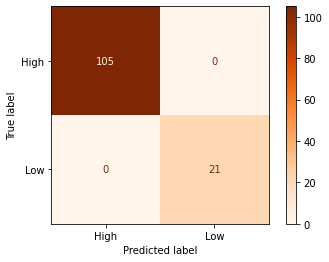

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["High", "Low"])
disp.plot(cmap='Oranges');

**Precision:**

In [ ]:
precision = 105/(105 + 0)
print(precision)

1.0


**Recall:**

In [ ]:
recall = 105/(105 +0)
print(recall)

1.0


**F1:**

In [ ]:
F1 = 2 * (precision * recall)/(precision + recall)
print(F1)

1.0


**ROC Curve:**

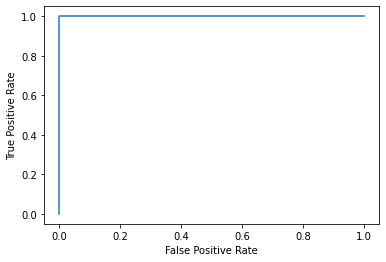

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, predictions, pos_label=None, sample_weight=None, drop_intermediate=True)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
metrics.auc(fpr, tpr)

1.0

# **Hyperparameter Tuning:**

**Ridge:**

- try to tune max_iter(interval of 100 or 1000) and solver

0.003185817173549107
0
[0.003185817173549107, 0.0031995863104749443, 0.0032108055072157457, 0.0032219869930557887, 0.003233130953880638, 0.003244237574344976, 0.003255307037872655, 0.0032663395266974713, 0.003277335221875809, 0.003288294303277769, 0.0032992169495900396, 0.0033101033383492514, 0.003320953645943776, 0.003331965865034969, 0.0033429481399254836, 0.0033538943100124004, 0.0033648957944730612, 0.003375872327533475, 0.003386812944430519, 0.003397717817854845, 0.003408587119430607, 0.0034194210196652587, 0.003430219687983718, 0.003440983292703275, 0.0034517120011106355, 0.003462440110060299, 0.003473220799547354, 0.00348399558797099, 0.003494820804252318, 0.0035056113456117142, 0.0035163673758319292, 0.0035270890576712143, 0.003537776552855314, 0.003548430022088588, 0.003559049625079832, 0.0035696355205301414, 0.0035801878661873626, 0.003590706818746188, 0.0036011925339836173, 0.0036116451666880866, 0.003622064870693473, 0.003632451798857305, 0.003642806103113562, 0.00365312793

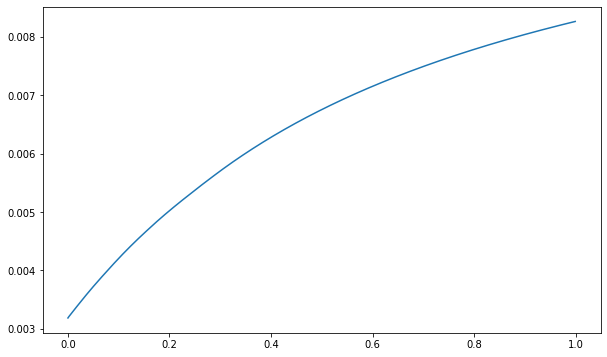

In [ ]:
mae_values = []
x_values = []
k = 0
while k < 1:
  reg = linear_model.Ridge(alpha = k)
  #Training
  reg.fit(X_train, y_train)

  #Prediction
  ridge_prediction = reg.predict(X_test)

  #Evaluation
  mean_absolute_error(y_test, ridge_prediction)

  mae_values.append(mean_absolute_error(y_test, ridge_prediction))

  x_values.append(k)
  k += .001

print(min(mae_values))
print(x_values[mae_values.index(min(mae_values))])
print(mae_values)
plt.figure(figsize=(10,6))
plt.plot(x_values, mae_values)

0.003970380118856868
[0.25, 0.5, 0.075]
[0.0053728551955798225, 0.006754753856839969, 0.003970380118856868]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


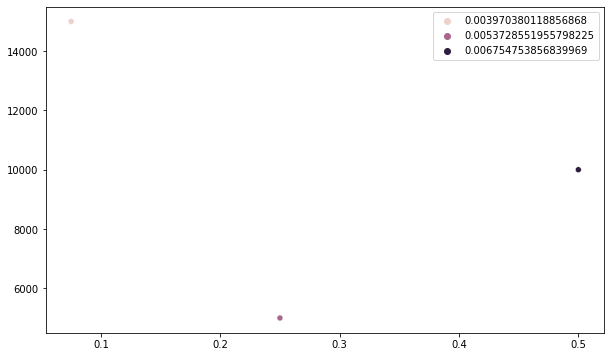

In [ ]:
mae_values = []
x_values = []
k = [.25, .5, .075]
m = [5000, 10000, 15000]
i = 0
while i < 3:
  reg = linear_model.Ridge(alpha = k[i], max_iter = m[i])
  #Training
  reg.fit(X_train, y_train)

  #Prediction
  ridge_prediction = reg.predict(X_test)

  #Evaluation
  mean_absolute_error(y_test, ridge_prediction)

  mae_values.append(mean_absolute_error(y_test, ridge_prediction))

  x_values.append(k)
  i += 1

print(min(mae_values))
print(x_values[mae_values.index(min(mae_values))])
print(mae_values)
plt.figure(figsize=(10,6))
sns.scatterplot(k, m, hue = mae_values)
plt.show()

1.4239866907574223e-05
0.001
1000
[1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 1.4239866907574223e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 2.8454084121996375e-05, 4.264272439562779e-05, 4.264272439562779e-05, 4.26427

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



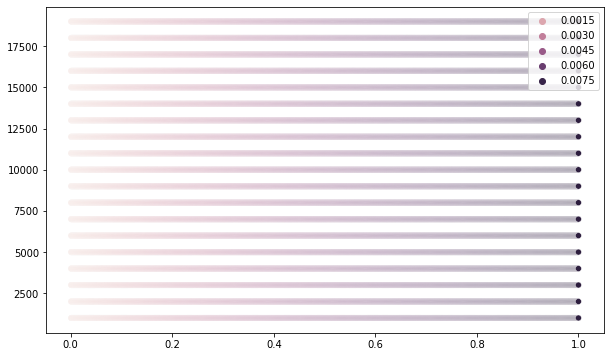

In [ ]:
mae_values = []
k_values = []
m_values = []
k = 0
data = []
item = []
while k < 1:
  k += .001
  m = 1000
  while m < 20000:
    reg = linear_model.Ridge(alpha = k, max_iter = m)
    #Training
    reg.fit(X_train, y_train)

    #Prediction
    ridge_prediction = reg.predict(X_test)

    #Evaluation
    mean_absolute_error(y_test, ridge_prediction)

    mae_values.append(mean_absolute_error(y_test, ridge_prediction))

    m_values.append(m)
    k_values.append(k)
    item.append(m)
    item.append(k)
    item.append(mean_absolute_error(y_test, ridge_prediction))
    data.append(item)
    item = []

    m += 1000

print(min(mae_values))
print(k_values[mae_values.index(min(mae_values))])
print(m_values[mae_values.index(min(mae_values))])
print(mae_values)
plt.figure(figsize=(10,6))
sns.scatterplot(k_values, m_values, hue = mae_values)
plt.show()
#add lables

**Heatmap:**

In [ ]:
print(data)

[[1000, 0.001, 1.4239866907574223e-05], [2000, 0.001, 1.4239866907574223e-05], [3000, 0.001, 1.4239866907574223e-05], [4000, 0.001, 1.4239866907574223e-05], [5000, 0.001, 1.4239866907574223e-05], [6000, 0.001, 1.4239866907574223e-05], [7000, 0.001, 1.4239866907574223e-05], [8000, 0.001, 1.4239866907574223e-05], [9000, 0.001, 1.4239866907574223e-05], [10000, 0.001, 1.4239866907574223e-05], [11000, 0.001, 1.4239866907574223e-05], [12000, 0.001, 1.4239866907574223e-05], [13000, 0.001, 1.4239866907574223e-05], [14000, 0.001, 1.4239866907574223e-05], [15000, 0.001, 1.4239866907574223e-05], [16000, 0.001, 1.4239866907574223e-05], [17000, 0.001, 1.4239866907574223e-05], [18000, 0.001, 1.4239866907574223e-05], [19000, 0.001, 1.4239866907574223e-05], [1000, 0.002, 2.8454084121996375e-05], [2000, 0.002, 2.8454084121996375e-05], [3000, 0.002, 2.8454084121996375e-05], [4000, 0.002, 2.8454084121996375e-05], [5000, 0.002, 2.8454084121996375e-05], [6000, 0.002, 2.8454084121996375e-05], [7000, 0.002, 

In [ ]:
df = pd.DataFrame(data, columns=['m_values', 'k_values', 'mae_values'])
df
df.to_csv('hm_data.csv')
print(k_values)
df.head()

[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008

,m_values,k_values,mae_values
0,1000,0.001,0.000014
1,2000,0.001,0.000014
2,3000,0.001,0.000014
3,4000,0.001,0.000014
4,5000,0.001,0.000014


In [ ]:
import plotly.express as px
hm_data = pd.read_csv("hm_data.csv")
#df = px.data.hm_data(indexed=True)
piv = pd.pivot_table(df, values='mae_values',index=['m_values'], columns=['k_values'], fill_value=0)
fig = px.imshow(piv)
fig.show()

In [ ]:
piv.head()

k_values,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.000
m_values,,,,,,,,,,,,,,,,,,,,,
1000,0.000014,0.000028,0.000043,0.000057,0.000071,0.000085,0.000099,0.000113,0.000127,0.000141,...,0.007817,0.007822,0.007827,0.007832,0.007837,0.007842,0.007847,0.007851,0.007856,0.007861
2000,0.000014,0.000028,0.000043,0.000057,0.000071,0.000085,0.000099,0.000113,0.000127,0.000141,...,0.007817,0.007822,0.007827,0.007832,0.007837,0.007842,0.007847,0.007851,0.007856,0.007861
3000,0.000014,0.000028,0.000043,0.000057,0.000071,0.000085,0.000099,0.000113,0.000127,0.000141,...,0.007817,0.007822,0.007827,0.007832,0.007837,0.007842,0.007847,0.007851,0.007856,0.007861
4000,0.000014,0.000028,0.000043,0.000057,0.000071,0.000085,0.000099,0.000113,0.000127,0.000141,...,0.007817,0.007822,0.007827,0.007832,0.007837,0.007842,0.007847,0.007851,0.007856,0.007861
5000,0.000014,0.000028,0.000043,0.000057,0.000071,0.000085,0.000099,0.000113,0.000127,0.000141,...,0.007817,0.007822,0.007827,0.007832,0.007837,0.007842,0.007847,0.007851,0.007856,0.007861


In [ ]:
z = [k_values,
     m_values]

fig = px.imshow(z, text_auto=True, aspect=mae_values)
fig.show()

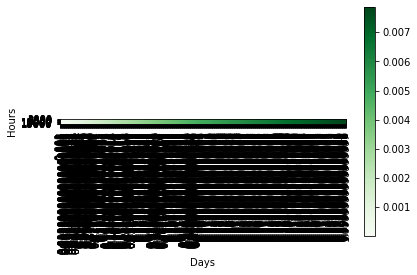

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(piv, cmap="Greens")
fig.colorbar(im, ax=ax)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(piv.columns, rotation=90)
ax.set_yticklabels(piv.index)
ax.set_xlabel("Days")
ax.set_ylabel("Hours")

plt.tight_layout()
plt.show()

hook: ask a question and immediatly answer it